In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LayerNormalization, Dropout, Reshape
from sklearn.preprocessing import MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load and preprocess data
df = pd.read_csv('/content/drive/MyDrive/pamap2_HAR_raw.csv')

In [4]:
df=df.head(25000)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   timestamp                    25000 non-null  float64
 1   heart_rate                   2287 non-null   float64
 2   IMU_hand_temperature         24997 non-null  float64
 3   IMU_hand_3D_acceleration_1   24997 non-null  float64
 4   IMU_hand_3D_acceleration_2   24997 non-null  float64
 5   IMU_hand_3D_acceleration_3   24997 non-null  float64
 6   IMU_hand_3D_acceleration_4   24997 non-null  float64
 7   IMU_hand_3D_acceleration_5   24997 non-null  float64
 8   IMU_hand_3D_acceleration_6   24997 non-null  float64
 9   IMU_hand_3D_gyroscope_1      24997 non-null  float64
 10  IMU_hand_3D_gyroscope_2      24997 non-null  float64
 11  IMU_hand_3D_gyroscope_3      24997 non-null  float64
 12  IMU_hand_3D_magnetometer_1   24997 non-null  float64
 13  IMU_hand_3D_magn

In [6]:
df.head()

,timestamp,heart_rate,IMU_hand_temperature,IMU_hand_3D_acceleration_1,IMU_hand_3D_acceleration_2,IMU_hand_3D_acceleration_3,IMU_hand_3D_acceleration_4,IMU_hand_3D_acceleration_5,IMU_hand_3D_acceleration_6,IMU_hand_3D_gyroscope_1,...,IMU_ankle_3D_gyroscope_3,IMU_ankle_3D_magnetometer_1,IMU_ankle_3D_magnetometer_2,IMU_ankle_3D_magnetometer_3,IMU_ankle_orientation_1,IMU_ankle_orientation_2,IMU_ankle_orientation_3,IMU_ankle_orientation_4,activityID,activity_name
0,0.00,2.0,3.000,4.00000,5.00000,6.00000,7.00000,8.00000,9.00000,10.000000,...,46.000000,47.0000,48.0000,49.0000,50.0,51.0,52.0,53.0,1,Lying
1,37.66,NaN,30.375,2.21530,8.27915,5.58753,2.24689,8.55387,5.77143,-0.004750,...,0.001752,-61.1081,-36.8636,-58.3696,1.0,0.0,0.0,0.0,1,Lying
2,37.67,NaN,30.375,2.29196,7.67288,5.74467,2.27373,8.14592,5.78739,-0.171710,...,0.006007,-60.8916,-36.3197,-58.3656,1.0,0.0,0.0,0.0,1,Lying
3,37.68,NaN,30.375,2.29090,7.14240,5.82342,2.26966,7.66268,5.78846,-0.238241,...,-0.004882,-60.3407,-35.7842,-58.6119,1.0,0.0,0.0,0.0,1,Lying
4,37.69,NaN,30.375,2.21800,7.14365,5.89930,2.22177,7.25535,5.88000,-0.192912,...,0.026950,-60.7646,-37.1028,-57.8799,1.0,0.0,0.0,0.0,1,Lying


<ipython-input-7-77c373d4c2f4>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['activity_name'], palette='viridis')


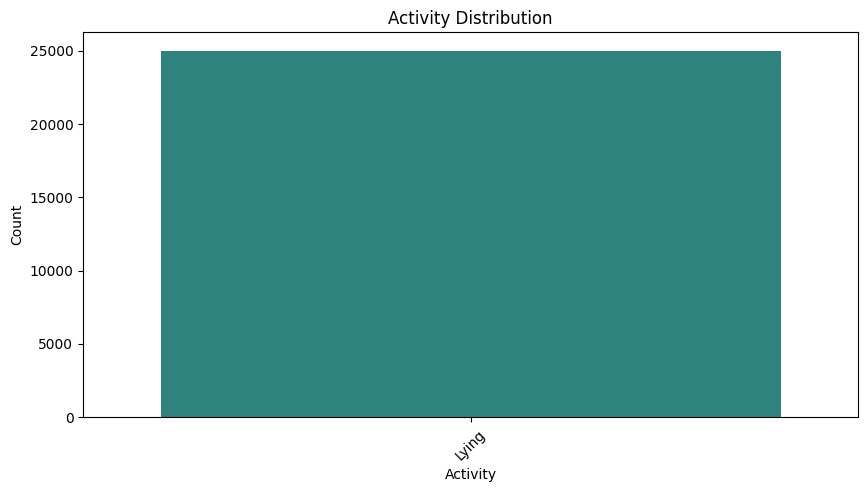

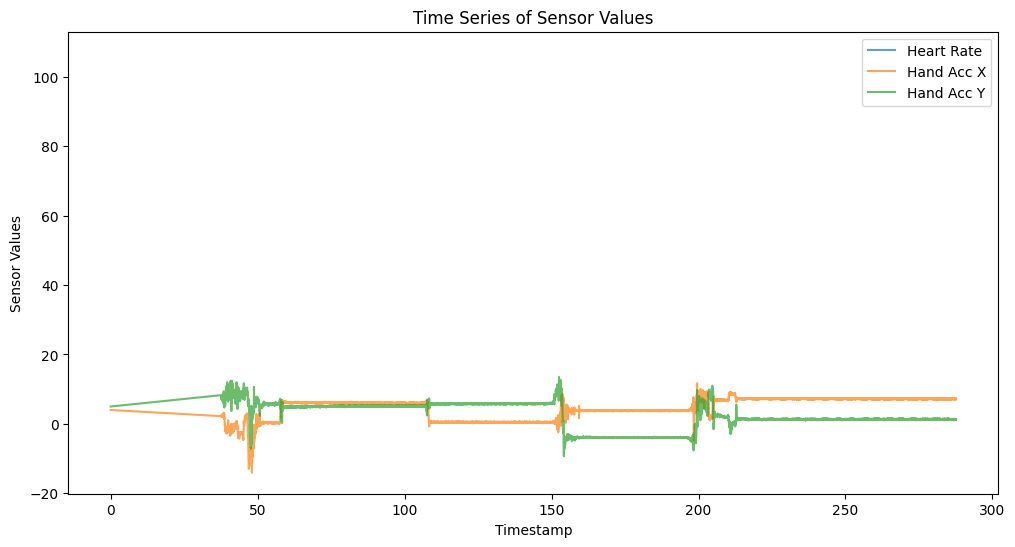

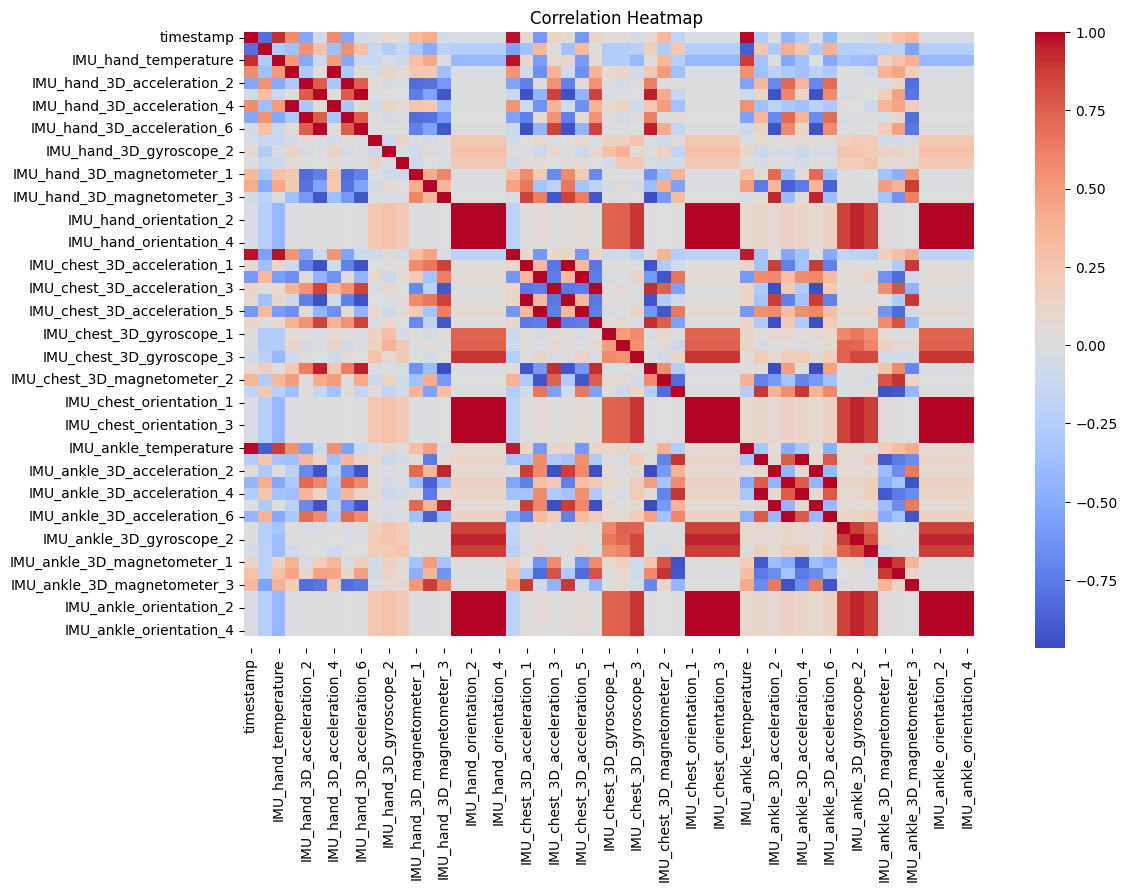

<ipython-input-7-77c373d4c2f4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


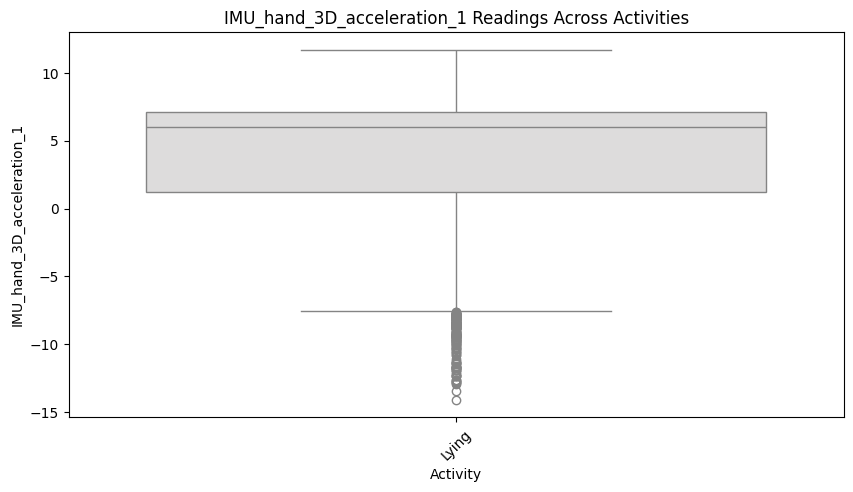

<ipython-input-7-77c373d4c2f4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


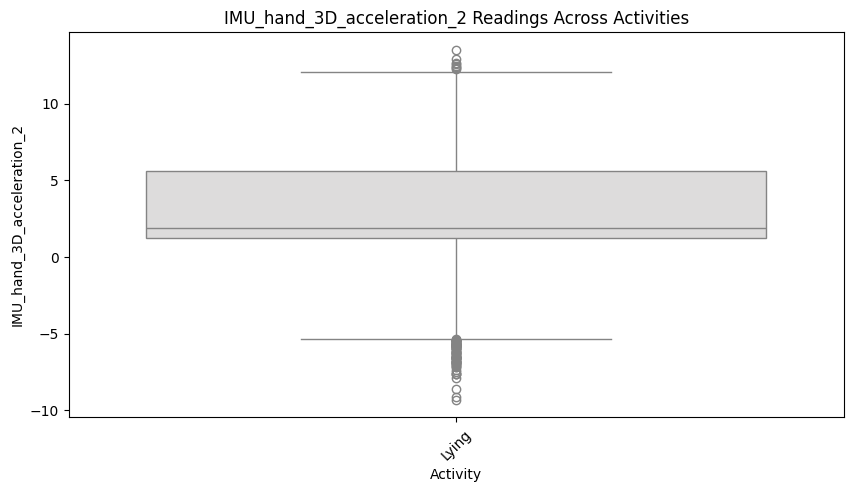

<ipython-input-7-77c373d4c2f4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


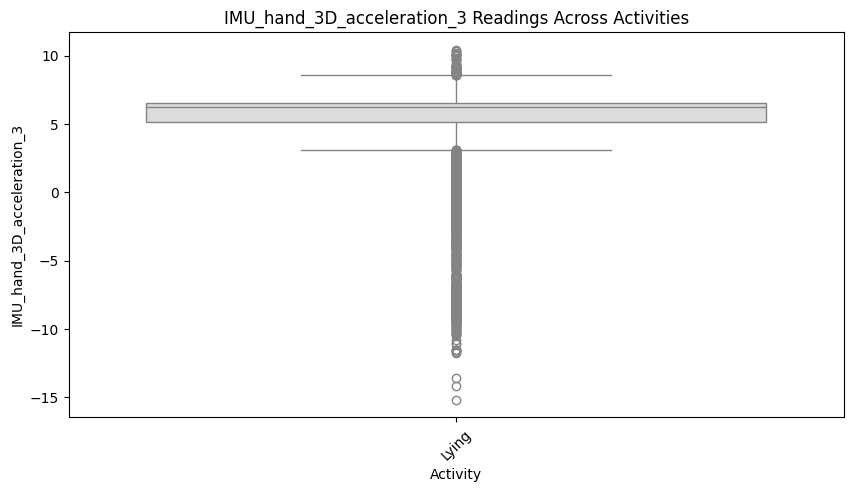

<ipython-input-7-77c373d4c2f4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


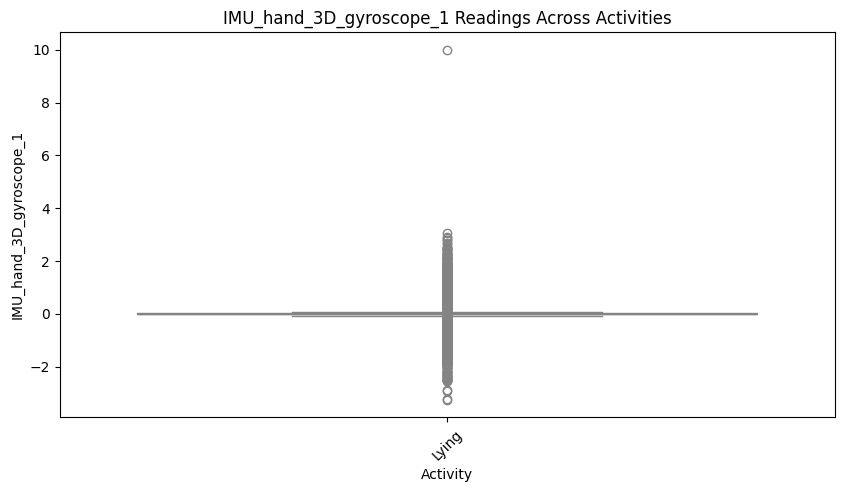

<ipython-input-7-77c373d4c2f4>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


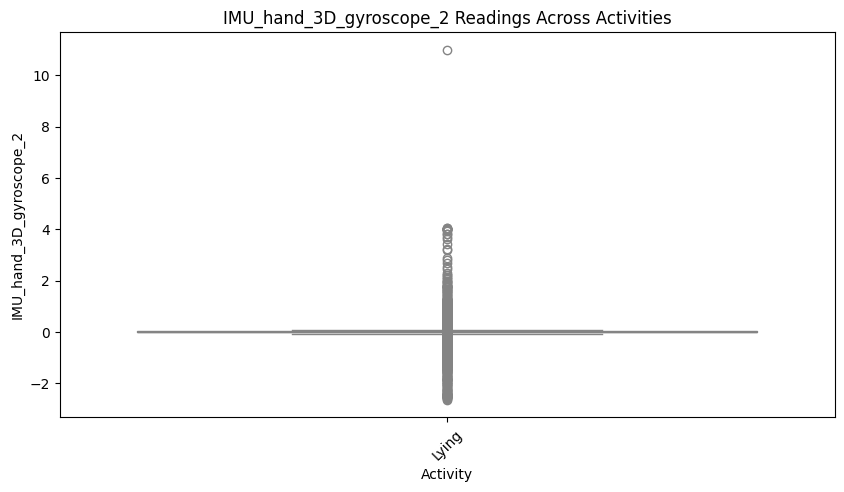

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Activity Distribution (Bar Chart)
plt.figure(figsize=(10, 5))
sns.countplot(x=df['activity_name'], palette='viridis')
plt.xlabel('Activity')
plt.ylabel('Count')
plt.title('Activity Distribution')
plt.xticks(rotation=45)
plt.show()

# 2. Time Series Plots for Sensor Values
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['heart_rate'], label='Heart Rate', alpha=0.7)
plt.plot(df['timestamp'], df['IMU_hand_3D_acceleration_1'], label='Hand Acc X', alpha=0.7)
plt.plot(df['timestamp'], df['IMU_hand_3D_acceleration_2'], label='Hand Acc Y', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Sensor Values')
plt.title('Time Series of Sensor Values')
plt.legend()
plt.show()

# 3. Correlation Heatmap (Only numerical columns)
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['activity_name']).corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# 4. Sensor Readings Per Activity (Boxplots)
sensor_columns = ['IMU_hand_3D_acceleration_1', 'IMU_hand_3D_acceleration_2',
                  'IMU_hand_3D_acceleration_3', 'IMU_hand_3D_gyroscope_1', 'IMU_hand_3D_gyroscope_2']

for sensor in sensor_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')
    plt.xlabel('Activity')
    plt.ylabel(sensor)
    plt.title(f'{sensor} Readings Across Activities')
    plt.xticks(rotation=45)
    plt.show()


<ipython-input-8-f22719db94b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


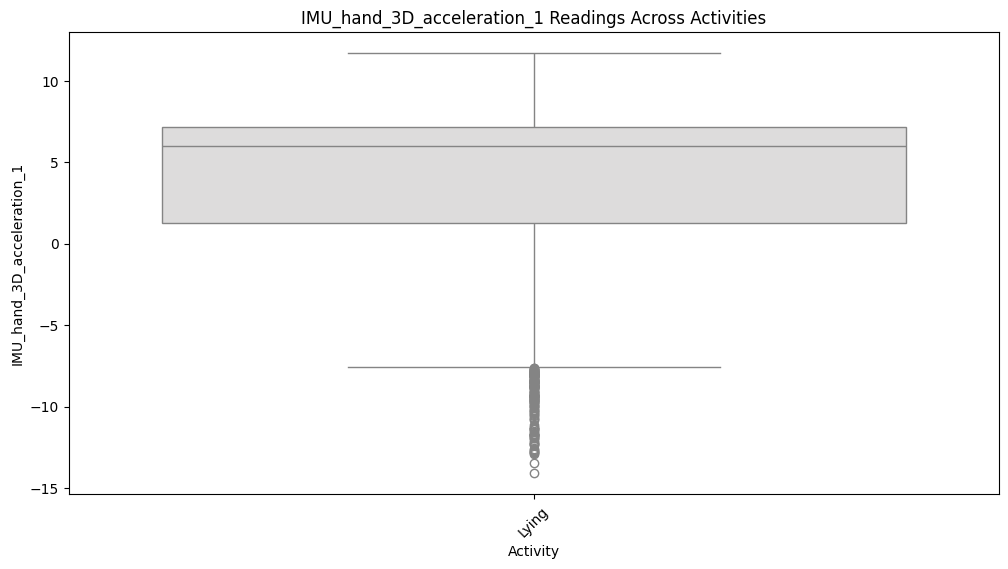

<ipython-input-8-f22719db94b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


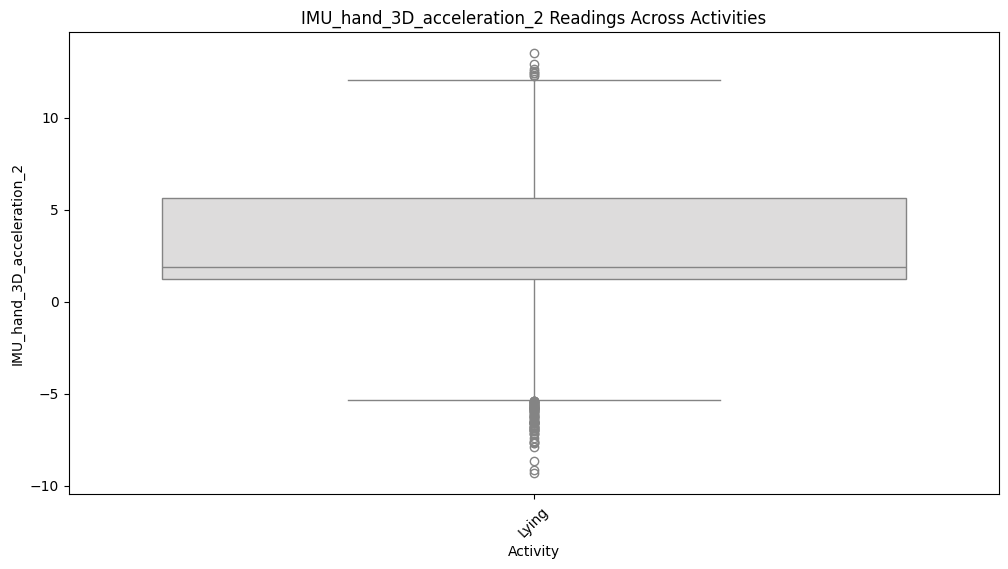

<ipython-input-8-f22719db94b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


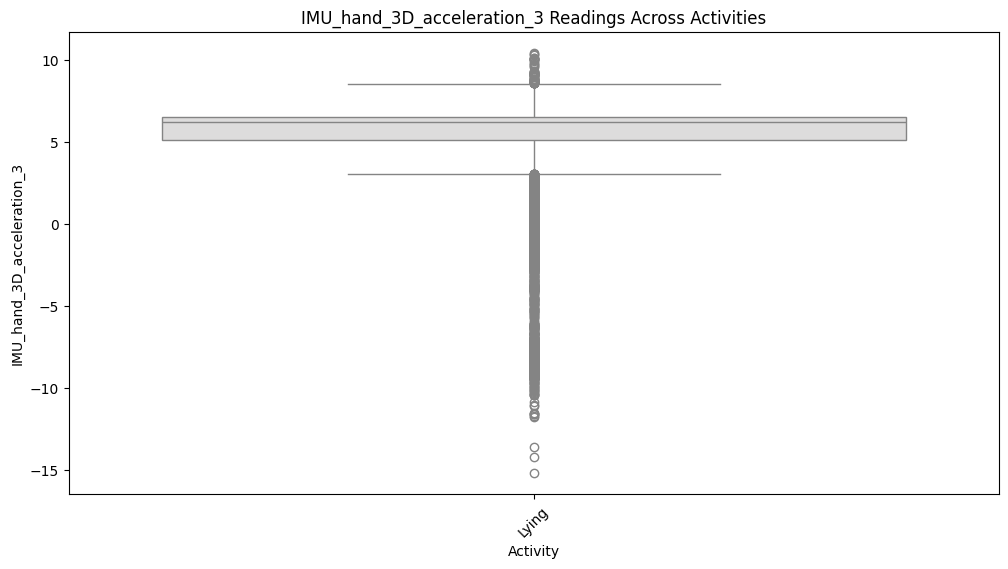

<ipython-input-8-f22719db94b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


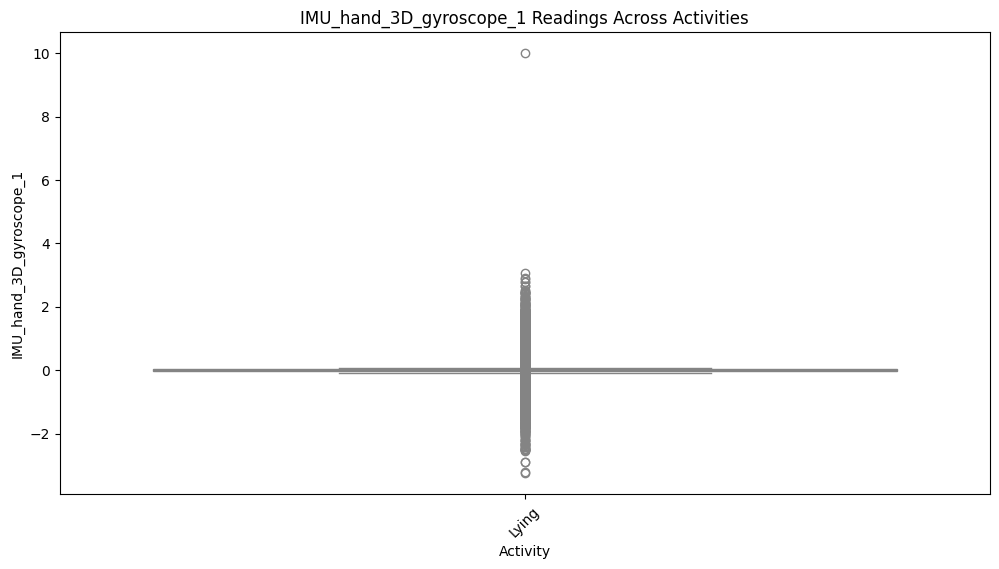

<ipython-input-8-f22719db94b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')


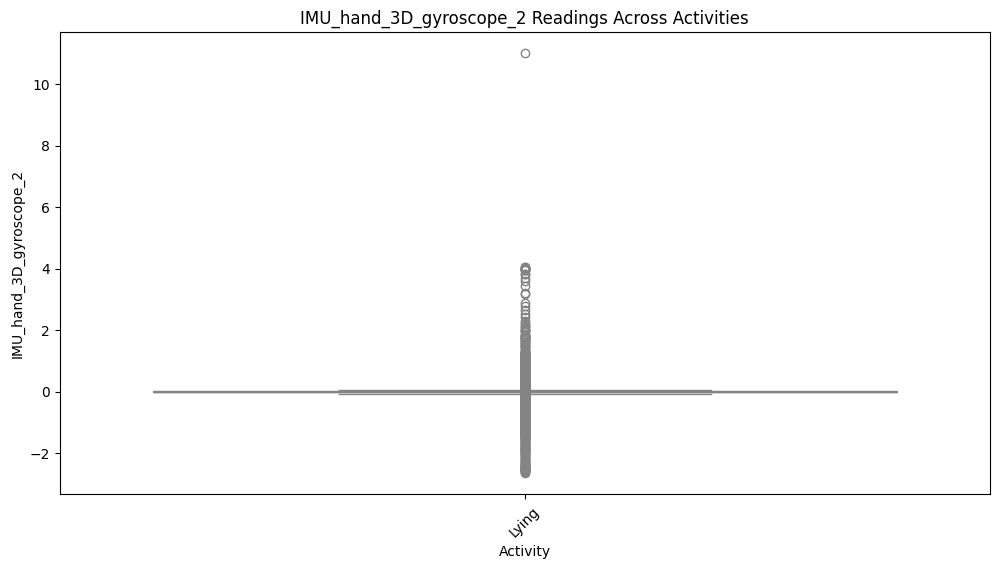

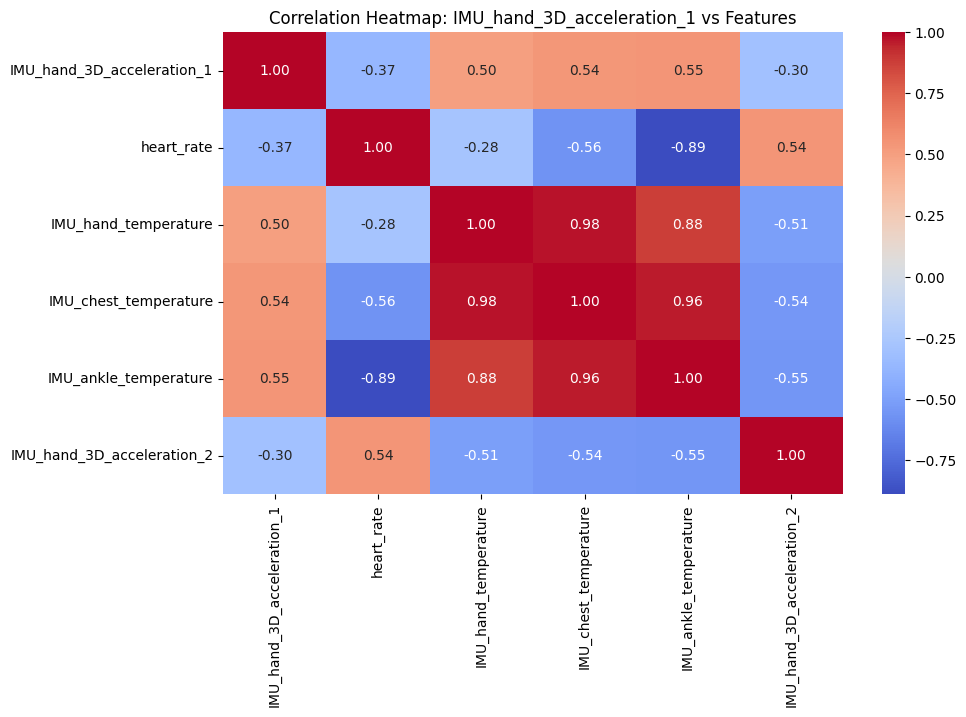

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define sensor columns for box plots
sensor_columns = [
    'IMU_hand_3D_acceleration_1', 'IMU_hand_3D_acceleration_2',
    'IMU_hand_3D_acceleration_3', 'IMU_hand_3D_gyroscope_1',
    'IMU_hand_3D_gyroscope_2'
]

# 1. Box Plots - Feature vs 5 Sensor Readings
for sensor in sensor_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['activity_name'], y=df[sensor], palette='coolwarm')
    plt.xlabel('Activity')
    plt.ylabel(sensor)
    plt.title(f'{sensor} Readings Across Activities')
    plt.xticks(rotation=45)
    plt.show()

# 2. Correlation Heatmap - 1 Sensor vs Various Features
selected_sensor = 'IMU_hand_3D_acceleration_1'  # Change to any sensor of interest
feature_columns = ['heart_rate', 'IMU_hand_temperature', 'IMU_chest_temperature',
                   'IMU_ankle_temperature', 'IMU_hand_3D_acceleration_2']

plt.figure(figsize=(10, 6))
sns.heatmap(df[[selected_sensor] + feature_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap: {selected_sensor} vs Features')
plt.show()


In [9]:
# Linear Interpolation and drop NANs
sensor_columns = [col for col in df.columns if col not in ['timestamp', 'activityID', 'activity_name']]
sensor_data = df[sensor_columns]
sensor_data = sensor_data.interpolate(method='linear', axis=0)
sensor_data = sensor_data.dropna()

In [10]:
# Feature Engineering
sensor_data['hand_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_hand_3D_acceleration_1']**2 +
    sensor_data['IMU_hand_3D_acceleration_2']**2 +
    sensor_data['IMU_hand_3D_acceleration_3']**2
)
sensor_data['chest_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_acceleration_1']**2 +
    sensor_data['IMU_chest_3D_acceleration_2']**2 +
    sensor_data['IMU_chest_3D_acceleration_3']**2
)
sensor_data['chest_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_gyroscope_1']**2 +
    sensor_data['IMU_chest_3D_gyroscope_2']**2 +
    sensor_data['IMU_chest_3D_gyroscope_3']**2
)
sensor_data['chest_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_chest_3D_magnetometer_1']**2 +
    sensor_data['IMU_chest_3D_magnetometer_2']**2 +
    sensor_data['IMU_chest_3D_magnetometer_3']**2
)
sensor_data['ankle_acc_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_acceleration_1']**2 +
    sensor_data['IMU_ankle_3D_acceleration_2']**2 +
    sensor_data['IMU_ankle_3D_acceleration_3']**2
)
sensor_data['ankle_gyro_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_gyroscope_1']**2 +
    sensor_data['IMU_ankle_3D_gyroscope_2']**2 +
    sensor_data['IMU_ankle_3D_gyroscope_3']**2
)
sensor_data['ankle_mag_magnitude'] = np.sqrt(
    sensor_data['IMU_ankle_3D_magnetometer_1']**2 +
    sensor_data['IMU_ankle_3D_magnetometer_2']**2 +
    sensor_data['IMU_ankle_3D_magnetometer_3']**2
)

# Drop original columns
cols_to_drop = [
    'IMU_chest_3D_acceleration_1', 'IMU_chest_3D_acceleration_2', 'IMU_chest_3D_acceleration_3',
    'IMU_hand_3D_acceleration_1', 'IMU_hand_3D_acceleration_2', 'IMU_hand_3D_acceleration_3',
    'IMU_chest_3D_gyroscope_1', 'IMU_chest_3D_gyroscope_2', 'IMU_chest_3D_gyroscope_3',
    'IMU_hand_3D_gyroscope_1', 'IMU_hand_3D_gyroscope_2', 'IMU_hand_3D_gyroscope_3',
    'IMU_chest_3D_magnetometer_1', 'IMU_chest_3D_magnetometer_2', 'IMU_chest_3D_magnetometer_3',
    'IMU_ankle_3D_acceleration_1', 'IMU_ankle_3D_acceleration_2', 'IMU_ankle_3D_acceleration_3',
    'IMU_ankle_3D_gyroscope_1', 'IMU_ankle_3D_gyroscope_2', 'IMU_ankle_3D_gyroscope_3',
    'IMU_ankle_3D_magnetometer_1', 'IMU_ankle_3D_magnetometer_2', 'IMU_ankle_3D_magnetometer_3'
]
sensor_data = sensor_data.drop(cols_to_drop, axis=1)

In [11]:
# Min-Max Scaling
scaler = MinMaxScaler()
sensor_data_scaled = scaler.fit_transform(sensor_data)
sensor_data_scaled = pd.DataFrame(sensor_data_scaled, columns=sensor_data.columns)

In [12]:
# Reintroduce for splitting
sensor_data_scaled['timestamp'] = df['timestamp']
sensor_data_scaled['activityID'] = df['activityID']
sensor_data_scaled['activity_name'] = df['activity_name']

In [13]:
sensor_data_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   heart_rate                   25000 non-null  float64
 1   IMU_hand_temperature         25000 non-null  float64
 2   IMU_hand_3D_acceleration_4   25000 non-null  float64
 3   IMU_hand_3D_acceleration_5   25000 non-null  float64
 4   IMU_hand_3D_acceleration_6   25000 non-null  float64
 5   IMU_hand_3D_magnetometer_1   25000 non-null  float64
 6   IMU_hand_3D_magnetometer_2   25000 non-null  float64
 7   IMU_hand_3D_magnetometer_3   25000 non-null  float64
 8   IMU_hand_orientation_1       25000 non-null  float64
 9   IMU_hand_orientation_2       25000 non-null  float64
 10  IMU_hand_orientation_3       25000 non-null  float64
 11  IMU_hand_orientation_4       25000 non-null  float64
 12  IMU_chest_temperature        25000 non-null  float64
 13  IMU_chest_3D_acc

In [14]:
sensor_data_scaled.head()

,heart_rate,IMU_hand_temperature,IMU_hand_3D_acceleration_4,IMU_hand_3D_acceleration_5,IMU_hand_3D_acceleration_6,IMU_hand_3D_magnetometer_1,IMU_hand_3D_magnetometer_2,IMU_hand_3D_magnetometer_3,IMU_hand_orientation_1,IMU_hand_orientation_2,...,hand_acc_magnitude,chest_acc_magnitude,chest_gyro_magnitude,chest_mag_magnitude,ankle_acc_magnitude,ankle_gyro_magnitude,ankle_mag_magnitude,timestamp,activityID,activity_name
0,0.000000,0.000000,0.815846,0.763252,0.943278,0.542917,0.647723,0.704719,1.0,1.0,...,0.311922,1.000000,1.000000,0.000000,1.000000,1.000000,0.462071,0.00,1,Lying
1,0.186667,0.948052,0.631633,0.787646,0.816350,0.507976,0.014334,0.377710,0.0,0.0,...,0.433379,0.111558,0.001353,0.760505,0.048682,0.000345,0.571266,37.66,1,Lying
2,0.373333,0.948052,0.632673,0.769679,0.816977,0.513567,0.014135,0.368981,0.0,0.0,...,0.402045,0.111583,0.001374,0.724768,0.048126,0.000266,0.566892,37.67,1,Lying
3,0.560000,0.948052,0.632516,0.748395,0.817019,0.509033,0.018438,0.382078,0.0,0.0,...,0.372072,0.115202,0.001228,0.751154,0.048227,0.000801,0.561847,37.68,1,Lying
4,0.746667,0.948052,0.630660,0.730455,0.820618,0.516522,0.018152,0.372243,0.0,0.0,...,0.374609,0.114329,0.001859,0.713725,0.047467,0.000580,0.565944,37.69,1,Lying


Columns in sensor_data_scaled: Index(['heart_rate', 'IMU_hand_temperature', 'IMU_hand_3D_acceleration_4',
       'IMU_hand_3D_acceleration_5', 'IMU_hand_3D_acceleration_6',
       'IMU_hand_3D_magnetometer_1', 'IMU_hand_3D_magnetometer_2',
       'IMU_hand_3D_magnetometer_3', 'IMU_hand_orientation_1',
       'IMU_hand_orientation_2', 'IMU_hand_orientation_3',
       'IMU_hand_orientation_4', 'IMU_chest_temperature',
       'IMU_chest_3D_acceleration_4', 'IMU_chest_3D_acceleration_5',
       'IMU_chest_3D_acceleration_6', 'IMU_chest_orientation_1',
       'IMU_chest_orientation_2', 'IMU_chest_orientation_3',
       'IMU_chest_orientation_4', 'IMU_ankle_temperature',
       'IMU_ankle_3D_acceleration_4', 'IMU_ankle_3D_acceleration_5',
       'IMU_ankle_3D_acceleration_6', 'IMU_ankle_orientation_1',
       'IMU_ankle_orientation_2', 'IMU_ankle_orientation_3',
       'IMU_ankle_orientation_4', 'hand_acc_magnitude', 'chest_acc_magnitude',
       'chest_gyro_magnitude', 'chest_mag_magnitude'

<ipython-input-15-a0e913076d82>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sensor_data_scaled['activity_name'], palette='viridis')


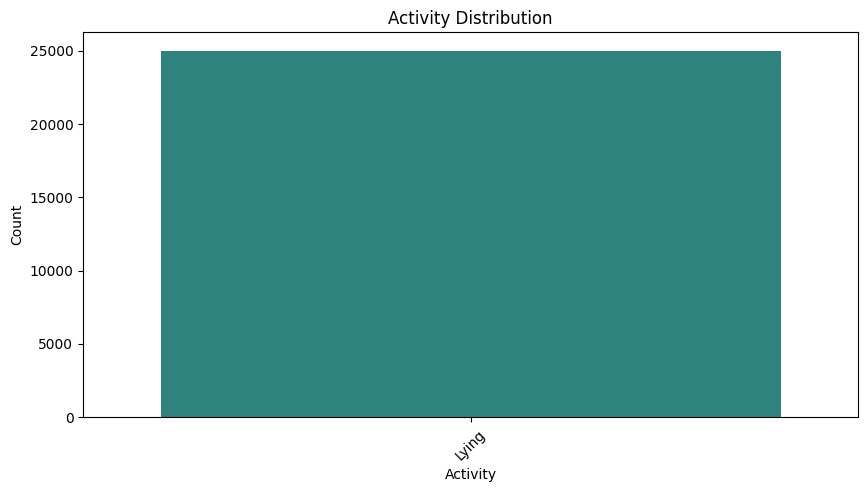

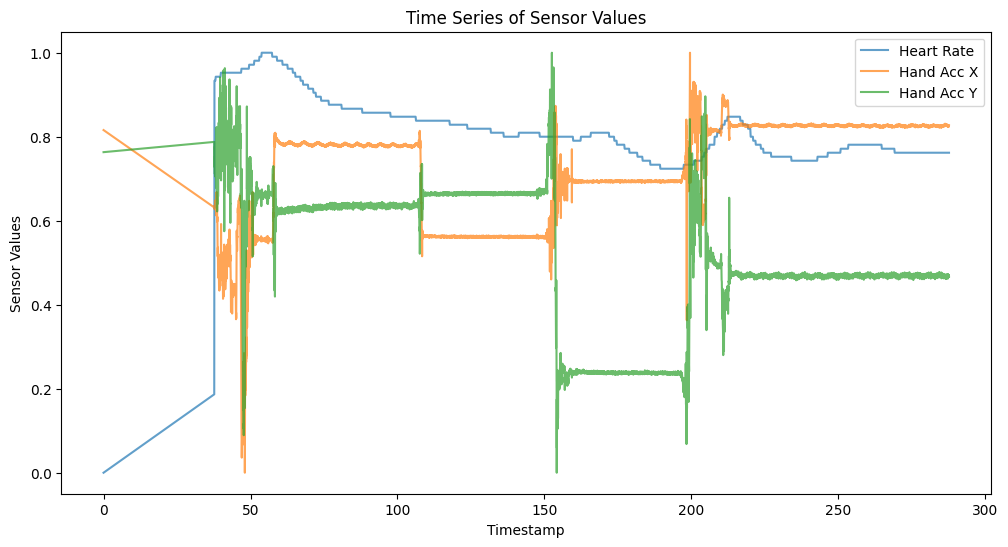

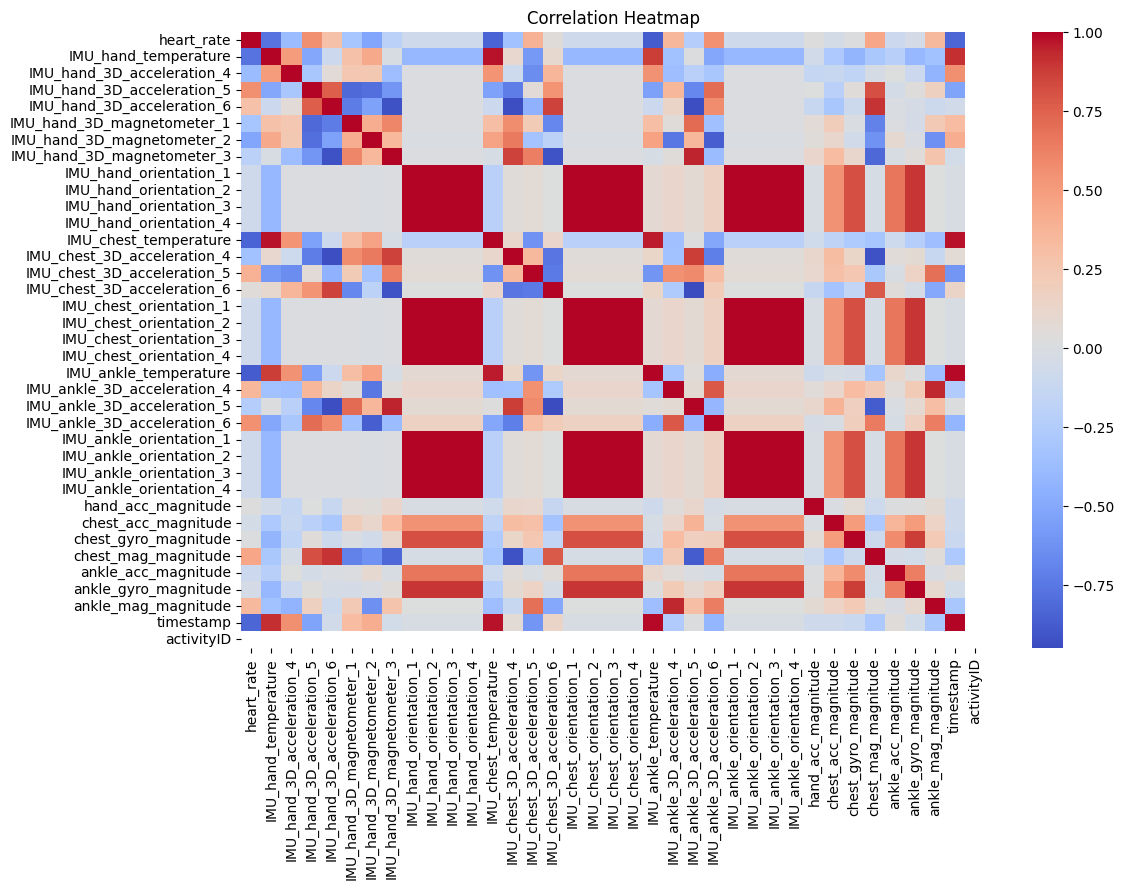

<ipython-input-15-a0e913076d82>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


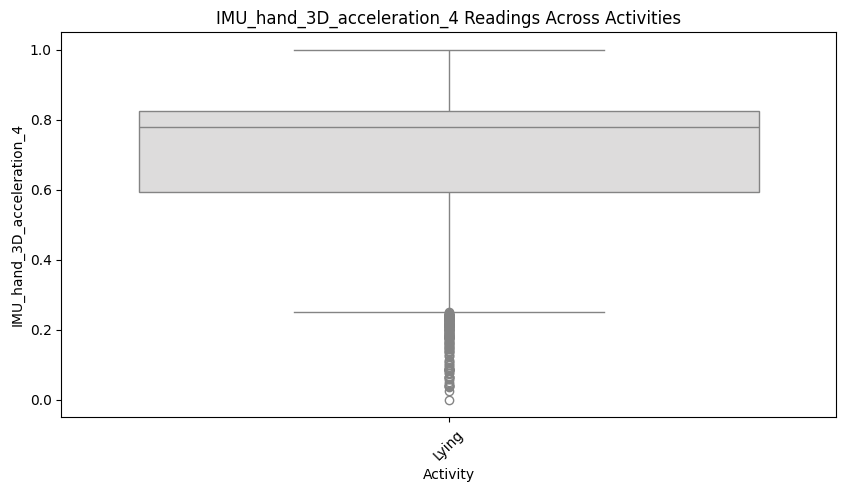

<ipython-input-15-a0e913076d82>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


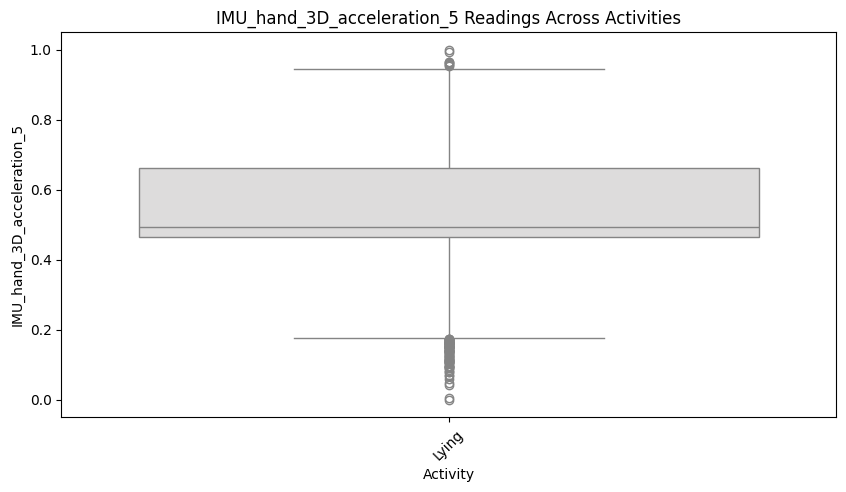

<ipython-input-15-a0e913076d82>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


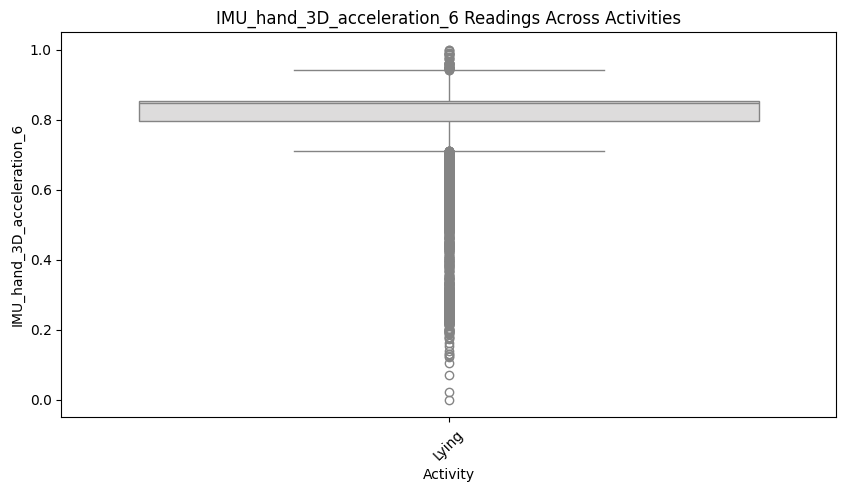

<ipython-input-15-a0e913076d82>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


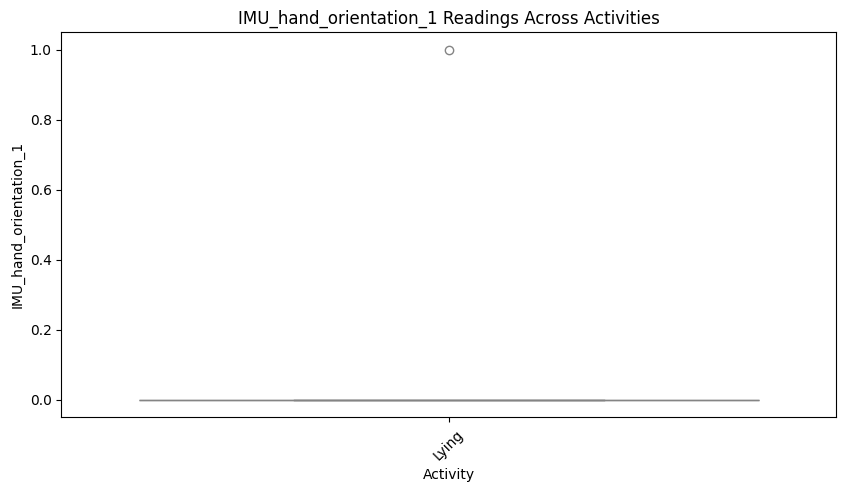

<ipython-input-15-a0e913076d82>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


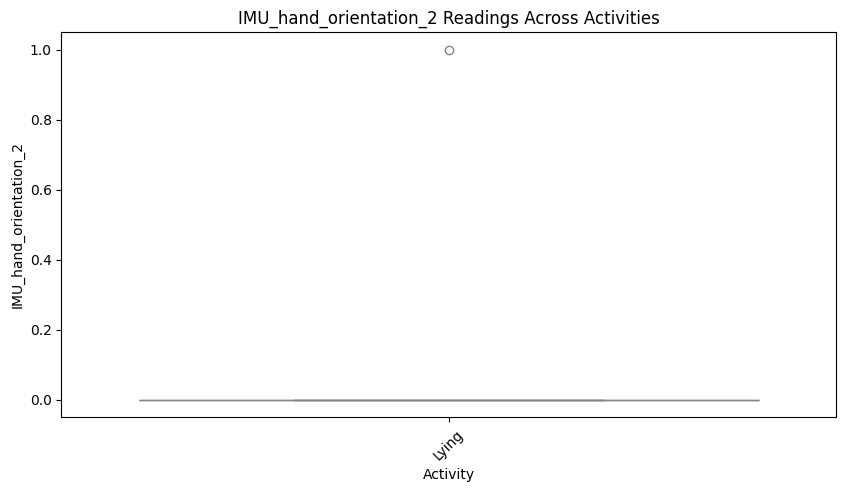

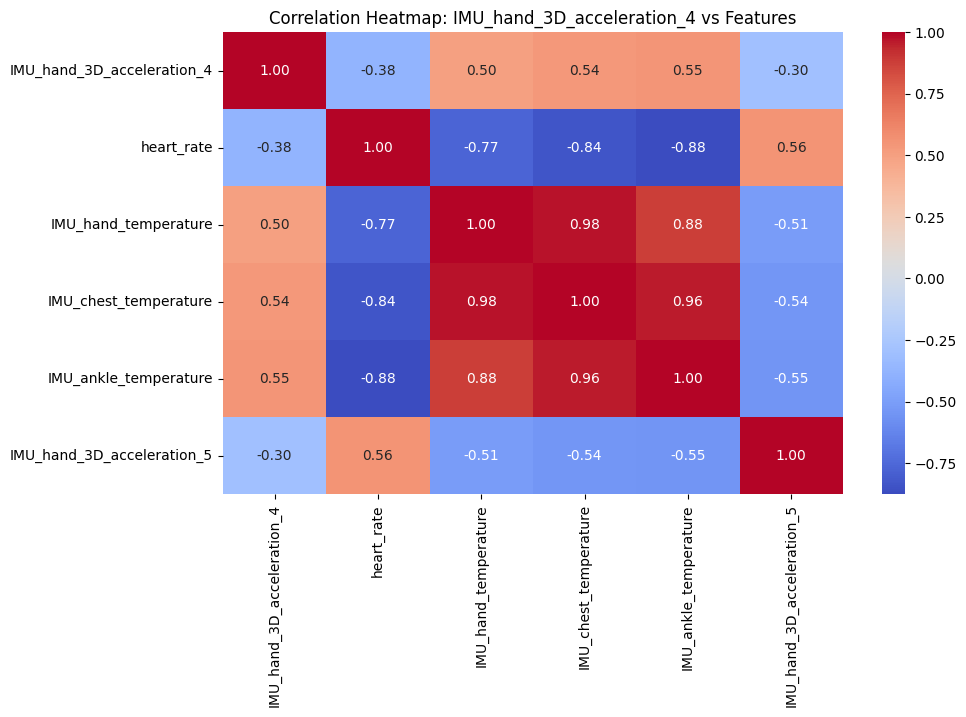

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Check available columns
print("Columns in sensor_data_scaled:", sensor_data_scaled.columns)

# Define correct sensor columns based on available ones
sensor_columns = [
    'IMU_hand_3D_acceleration_4', 'IMU_hand_3D_acceleration_5',
    'IMU_hand_3D_acceleration_6', 'IMU_hand_orientation_1',
    'IMU_hand_orientation_2'
]

# 1. Activity Distribution (Bar Chart)
if 'activity_name' in sensor_data_scaled.columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=sensor_data_scaled['activity_name'], palette='viridis')
    plt.xlabel('Activity')
    plt.ylabel('Count')
    plt.title('Activity Distribution')
    plt.xticks(rotation=45)
    plt.show()

# 2. Time Series Plots for Sensor Values
plt.figure(figsize=(12, 6))
plt.plot(sensor_data_scaled['timestamp'], sensor_data_scaled['heart_rate'], label='Heart Rate', alpha=0.7)
plt.plot(sensor_data_scaled['timestamp'], sensor_data_scaled['IMU_hand_3D_acceleration_4'], label='Hand Acc X', alpha=0.7)
plt.plot(sensor_data_scaled['timestamp'], sensor_data_scaled['IMU_hand_3D_acceleration_5'], label='Hand Acc Y', alpha=0.7)
plt.xlabel('Timestamp')
plt.ylabel('Sensor Values')
plt.title('Time Series of Sensor Values')
plt.legend()
plt.show()

# 3. Correlation Heatmap (Only numerical columns)
numerical_columns = sensor_data_scaled.select_dtypes(include=['float64', 'int64']).columns
if 'activity_name' in numerical_columns:
    numerical_columns = numerical_columns.drop('activity_name')  # Drop categorical columns

plt.figure(figsize=(12, 8))
sns.heatmap(sensor_data_scaled[numerical_columns].corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# 4. Sensor Readings Per Activity (Boxplots)
if 'activity_name' in sensor_data_scaled.columns:
    for sensor in sensor_columns:
        if sensor in sensor_data_scaled.columns:
            plt.figure(figsize=(10, 5))
            sns.boxplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')
            plt.xlabel('Activity')
            plt.ylabel(sensor)
            plt.title(f'{sensor} Readings Across Activities')
            plt.xticks(rotation=45)
            plt.show()

# 5. Box Plots - Feature vs 5 Sensor Readings (Repetition removed)
# Already included in the previous step.

# 6. Correlation Heatmap - 1 Sensor vs Various Features
selected_sensor = 'IMU_hand_3D_acceleration_4'  # Use existing sensor
feature_columns = ['heart_rate', 'IMU_hand_temperature', 'IMU_chest_temperature',
                   'IMU_ankle_temperature', 'IMU_hand_3D_acceleration_5']

# Ensure selected columns exist
valid_features = [col for col in [selected_sensor] + feature_columns if col in sensor_data_scaled.columns]

plt.figure(figsize=(10, 6))
sns.heatmap(sensor_data_scaled[valid_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Correlation Heatmap: {selected_sensor} vs Features')
plt.show()

<Figure size 1200x800 with 0 Axes>

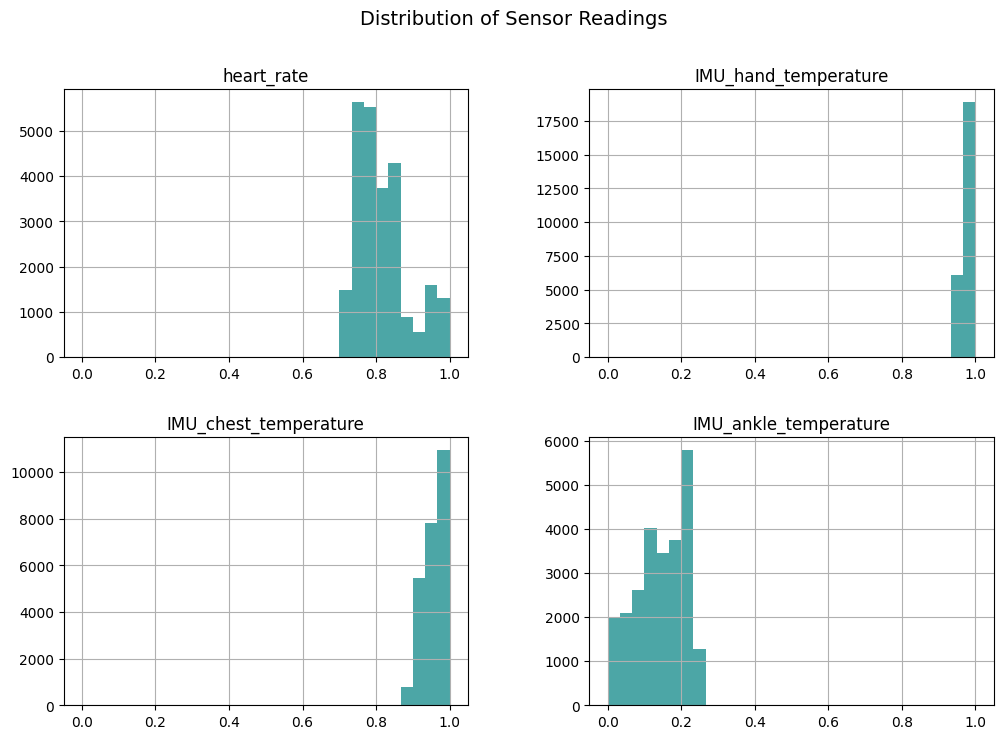

In [16]:
# Histogram for Sensor Data Distribution
sensor_columns = ['heart_rate', 'IMU_hand_temperature', 'IMU_chest_temperature', 'IMU_ankle_temperature']

plt.figure(figsize=(12, 8))
sensor_data_scaled[sensor_columns].hist(bins=30, figsize=(12, 8), layout=(2, 2), alpha=0.7, color='teal')
plt.suptitle('Distribution of Sensor Readings', fontsize=14)
plt.show()

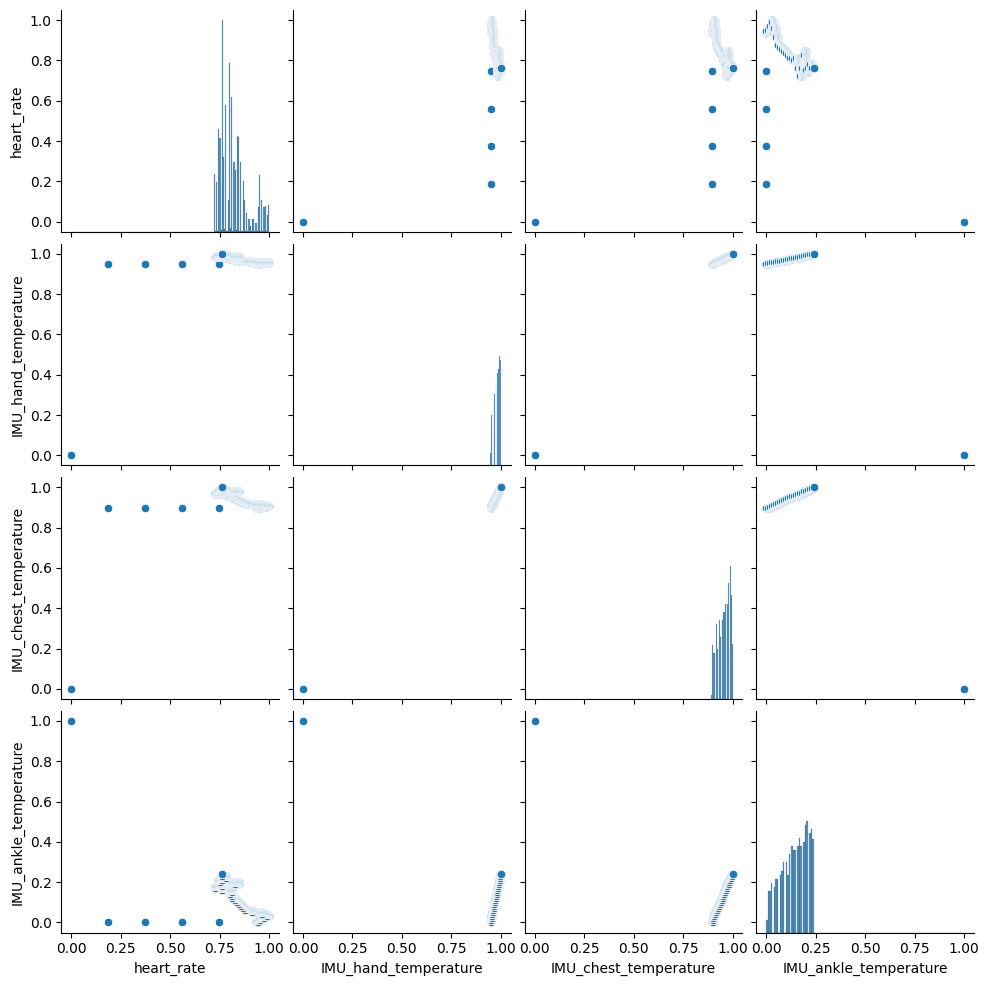

In [17]:
# Pairplot for sensor features
selected_features = ['heart_rate', 'IMU_hand_temperature', 'IMU_chest_temperature', 'IMU_ankle_temperature']
sns.pairplot(sensor_data_scaled[selected_features])
plt.show()


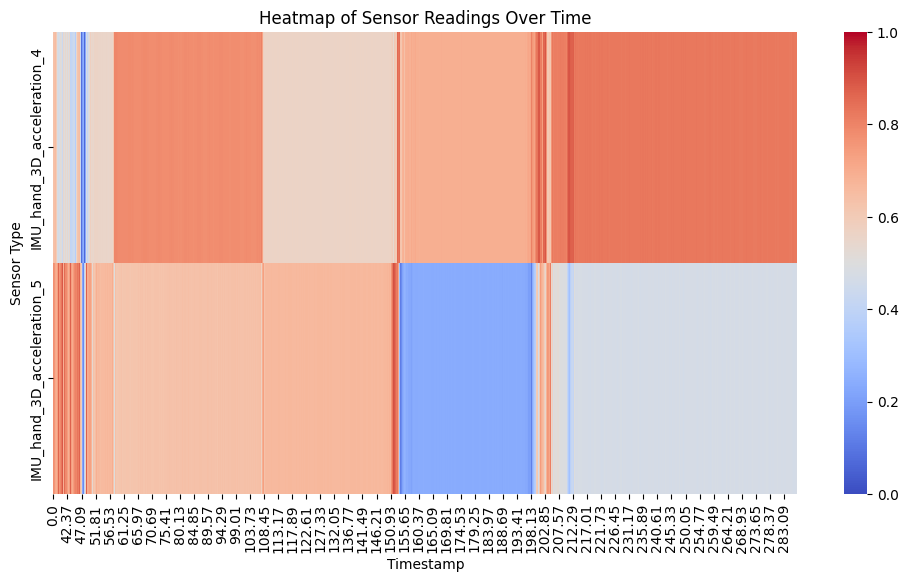

In [18]:
# Pivot the data for heatmap
subset = sensor_data_scaled[['timestamp', 'IMU_hand_3D_acceleration_4', 'IMU_hand_3D_acceleration_5']]
subset = subset.set_index('timestamp').sort_index()

plt.figure(figsize=(12, 6))
sns.heatmap(subset.T, cmap='coolwarm', cbar=True)
plt.title('Heatmap of Sensor Readings Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Sensor Type')
plt.show()

<ipython-input-19-96eb4e99d38d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


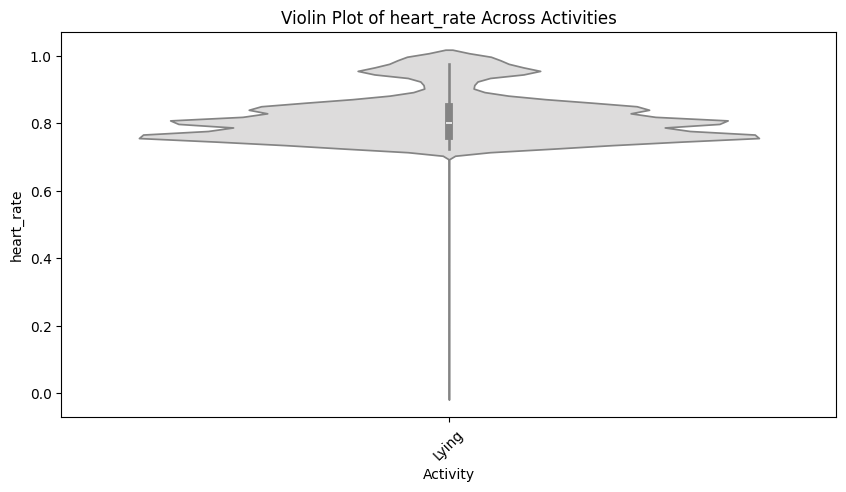

<ipython-input-19-96eb4e99d38d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


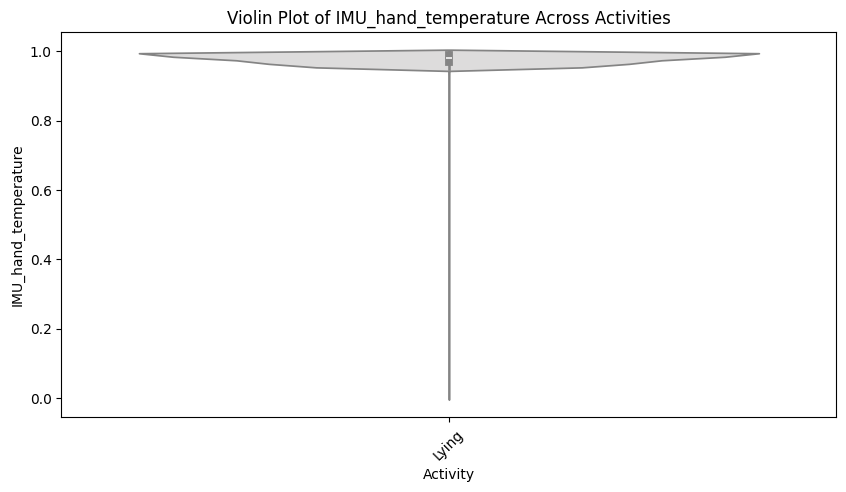

<ipython-input-19-96eb4e99d38d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


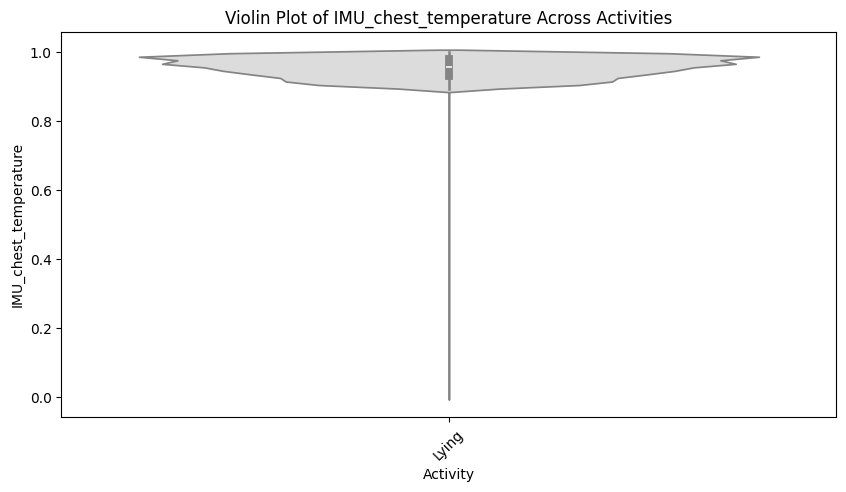

<ipython-input-19-96eb4e99d38d>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')


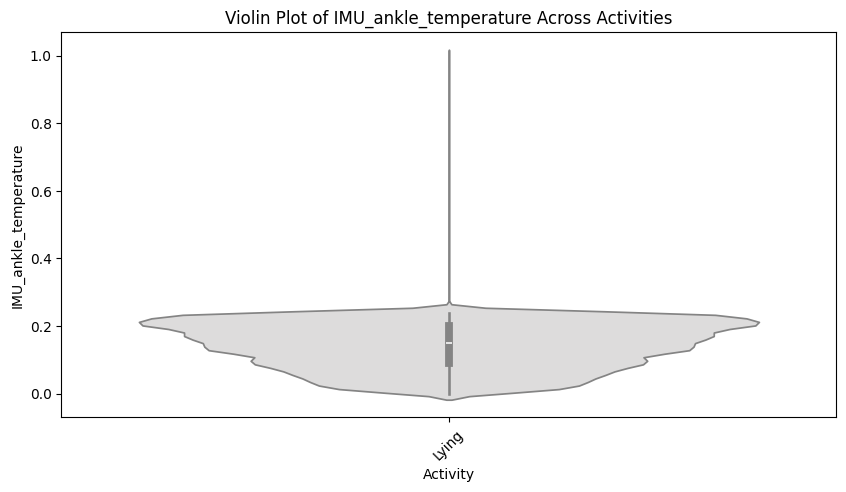

In [19]:
for sensor in sensor_columns:
    if sensor in sensor_data_scaled.columns:
        plt.figure(figsize=(10, 5))
        sns.violinplot(x=sensor_data_scaled['activity_name'], y=sensor_data_scaled[sensor], palette='coolwarm')
        plt.xlabel('Activity')
        plt.ylabel(sensor)
        plt.title(f'Violin Plot of {sensor} Across Activities')
        plt.xticks(rotation=45)
        plt.show()